tuned_Gemini-1.5-Flash-002_F1 Score: 0.86
tuned_Gemini-1.5-Flash-002_AUC: 0.84
tuned_Gemini-1.5-Flash-002_Confusion Matrix:
[[36 14]
 [ 2 48]]


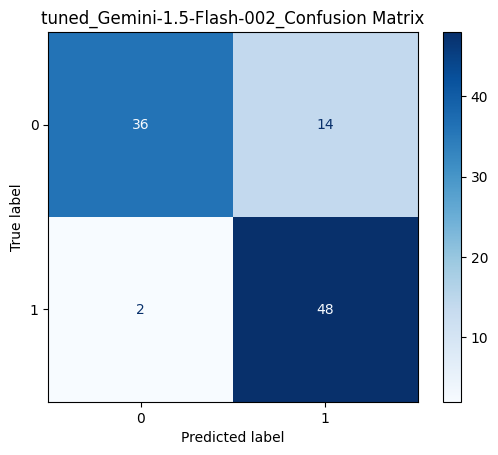

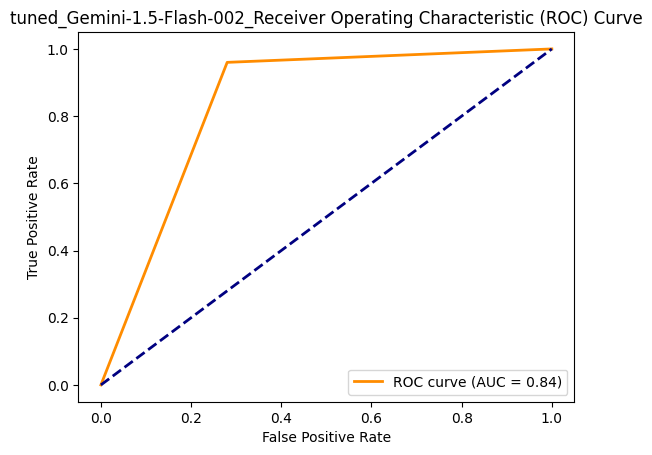

In [4]:
import pandas as pd
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# CSV 파일 읽기
data = pd.read_csv('/content/sample_data/tuned_Gemini_output.csv')  # 'output.csv' 경로에 맞게 수정 가능

# 실제 값 (Label)과 예측 값 (Predicted) 분리
y_true = data['Label']  # 실제 레이블
y_pred = data['Predicted']  # 예측된 레이블

# ROC 곡선 및 AUC 계산
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# F1 스코어 계산
f1 = f1_score(y_true, y_pred)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)

# 결과 출력
print(f"tuned_Gemini-1.5-Flash-002_F1 Score: {f1:.2f}")
print(f"tuned_Gemini-1.5-Flash-002_AUC: {roc_auc:.2f}")
print("tuned_Gemini-1.5-Flash-002_Confusion Matrix:")
print(conf_matrix)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('tuned_Gemini-1.5-Flash-002_Confusion Matrix')
plt.show()

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('tuned_Gemini-1.5-Flash-002_Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
